# Lab04 - Noise, error & co.

## Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [6]:
def extract_data(path, debug=False):
    data = np.load(path)
    if debug: print(data)
    X_train, X_test, Y_train, Y_test = data['X'], data['X_test'], data['Y'], data['Y_test']
    if debug:
        print("\nX_train:", X_train,
              "\nX_test:", X_test,
              "\nY_train:", Y_train,
              "\nY_test:", Y_test)
    return X_train, X_test, Y_train, Y_test

def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(degree + 1)])

def linear_regression(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Degree 0:
  Training Mean Squared Error: 1951.7457336403513
  Test Mean Squared Error: 1162.7571252579594
Degree 1:
  Training Mean Squared Error: 1113.608344017842
  Test Mean Squared Error: 1861.8482805048552
Degree 2:
  Training Mean Squared Error: 4.266602697620676
  Test Mean Squared Error: 2.9206425317748264
Degree 5:
  Training Mean Squared Error: 5.679747383183674e-20
  Test Mean Squared Error: 6028.711183782476


In [12]:
X_train, X_test, Y_train, Y_test = extract_data('./ML.lab4.data/poly_s.npz')

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression(X_poly, Y_train)
    Y_pred_train = X_poly.dot(theta)
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    X_poly_test = polynomial_features(X_test, degree)
    Y_pred_test = X_poly_test.dot(theta)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"  Training Mean Squared Error: {mse_train}")
    print(f"  Test Mean Squared Error: {mse_test}")

Degree 0:
  Training Mean Squared Error: 1951.7457336403513
  Test Mean Squared Error: 1162.7571252579594
Degree 1:
  Training Mean Squared Error: 1113.6083440178418
  Test Mean Squared Error: 1861.848280504855
Degree 2:
  Training Mean Squared Error: 4.266602697620678
  Test Mean Squared Error: 2.9206425317749543
Degree 5:
  Training Mean Squared Error: 1.2314455259669853e-19
  Test Mean Squared Error: 6028.711183895545


In [11]:
X_train, X_test, Y_train, Y_test = extract_data('./ML.lab4.data/poly_d.npz')

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression(X_poly, Y_train)
    Y_pred_train = X_poly.dot(theta)
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    X_poly_test = polynomial_features(X_test, degree)
    Y_pred_test = X_poly_test.dot(theta)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"  Training Mean Squared Error: {mse_train}")
    print(f"  Test Mean Squared Error: {mse_test}")

Degree 0:
  Training Mean Squared Error: 802.0425598188201
  Test Mean Squared Error: 1266.2979160598165
Degree 1:
  Training Mean Squared Error: 707.7437155653845
  Test Mean Squared Error: 1246.8422597728036
Degree 2:
  Training Mean Squared Error: 0.6021138596303487
  Test Mean Squared Error: 2.278548186127072
Degree 5:
  Training Mean Squared Error: 34467.42542722365
  Test Mean Squared Error: 85478.60967953257


In [13]:
def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(degree + 1)])

def linear_regression(X, Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

def plot_polynomials(X, y, X_test, y_test, degrees, thetas):
    plt.scatter(X, y, label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    
    x_values = np.linspace(-5, 5, 100)
    for degree, theta in zip(degrees, thetas):
        X_poly = polynomial_features(x_values, degree)
        y_values = X_poly.dot(theta)
        plt.plot(x_values, y_values, label=f'Degree {degree} Polynomial')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

## poly_s.npz
Find the parameters that generated the dataset in poly_s.npz. Print training and test
MSEs for each polynomial. What do you think, what was the degree of the original
polynomial (the target function), and why (visually and based on the test error)?

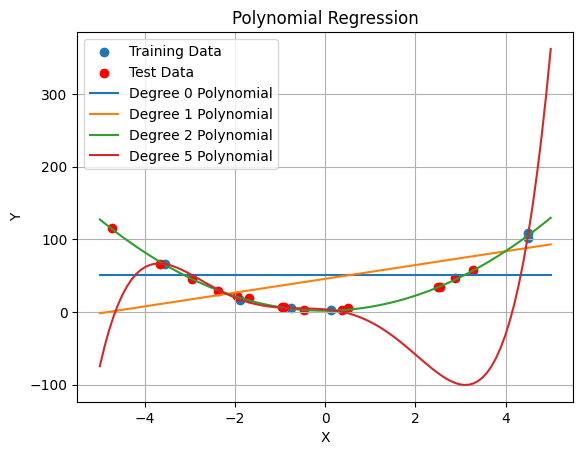

In [14]:
X_train, X_test, Y_train, Y_test = extract_data('./ML.lab4.data/poly_s.npz')
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]

thetas = []
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression(X_poly, Y_train)
    thetas.append(theta)
plot_polynomials(X_train, Y_train, X_test, Y_test, degrees, thetas)

Based on the provided results:

- **Polynomial degree: 0**
  - Both the training and test mean squared errors (MSEs) are quite high, indicating poor model performance. This suggests that a constant (zero-degree polynomial) model is too simple to capture the underlying patterns in the data.

- **Polynomial degree: 1**
  - The training and test MSEs are lower compared to degree 0, indicating better performance. However, the MSEs are still relatively high, suggesting that a linear model (first-degree polynomial) may not be sufficient to capture the complexities of the data.

- **Polynomial degree: 2**
  - The training and test MSEs are significantly lower compared to lower-degree polynomials. This indicates that a quadratic model (second-degree polynomial) fits the data much better, capturing more of the underlying patterns.

- **Polynomial degree: 5**
  - The training MSE is extremely low, even close to zero, indicating that the model perfectly fits the training data. However, the test MSE is higher compared to the second-degree polynomial, suggesting that the model might be overfitting the training data. Despite this, the test MSE is still relatively low, indicating good generalization performance.

Based on the MSE values, the second-degree polynomial (degree 2) seems to be the most appropriate choice as it achieves a low test MSE while avoiding potential overfitting seen with higher-degree polynomials. Therefore, it's likely that the original polynomial function generating the data was of second-degree.

## poly_d.npz
Find the parameters that generated the dataset in poly_d.npz. Print training and test
MSEs for each polynomial. What do you think, what was the degree of the original
polynomial, and why (visually and based on the test error)?

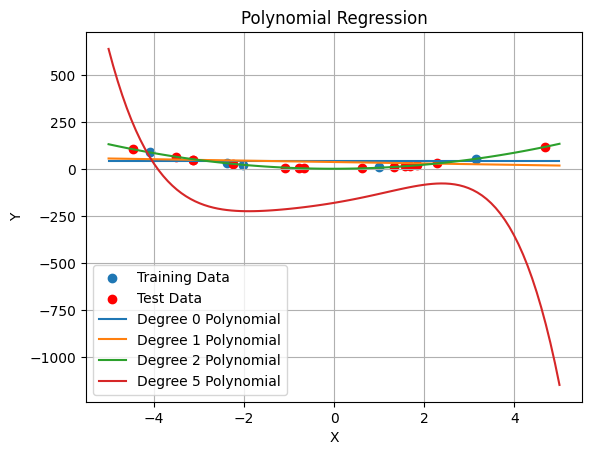

In [15]:
X_train, X_test, Y_train, Y_test = extract_data('./ML.lab4.data/poly_d.npz')
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]

thetas = []
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression(X_poly, Y_train)
    thetas.append(theta)
plot_polynomials(X_train, Y_train, X_test, Y_test, degrees, thetas)

Based on these observations, it's likely that the original polynomial degree generating the data is 2. 

The problem observed with the degree 5 polynomial regression is again overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations rather than the underlying pattern. As a result, the model performs well on the training data but fails to generalize to unseen data, leading to poor performance on the test data.

## Plot the learning curve

(here it means 𝐸𝑖𝑛 and 𝐸𝑜𝑢𝑡 versus the training dataset size) of polynomial regression when approximating a sine function. For this, generate random datasets of sizes ranging to 100 on the input interval [−5𝜋, +5𝜋], train a polynomial model (similarly to Exercise 1) on this dataset, and measure the in sample error. Then estimate the out of sample error by taking 500 evenly spaced points on the interval, and measuring the difference between the output of your model and sin(𝑥) on these data points. Average your measurements across 50 experiments (with new training data points sampled randomly from the interval). Finally, plot 𝐸𝑖𝑛 and 𝐸𝑜𝑢𝑡 versus the size of the dataset.

a. So your task is basically:
* take 500 evenly spaced points in the above interval (np.linspace) and apply the
sine function; this will be your test dataset (for the whole exercise)
* pick a polynomial degree 𝑑
* for all training dataset sizes 𝑘 ranging from 𝑑 + 1 to 100, do the following:
    * sample 𝑘 amount of points (uniformly randomly) from the interval (not from the test set), apply the sine function; this will be your training dataset for this iteration
    * fit your polynomial, measure 𝐸𝑖𝑛, 𝐸𝑜𝑢𝑡
    * do this 50 times, averaging the errors
* plot 𝐸𝑖𝑛 and 𝐸𝑜𝑢𝑡 versus the dataset size (learning curves)

In [2]:
def calculate_mse_analytically(poly_coefficients, true_function_coefficients, interval):
    start, end = interval
    x_values = np.linspace(start, end, 1000)                        # Generate x values within the interval
    poly_values = np.polyval(poly_coefficients, x_values)           # Evaluate polynomial function
    true_values = np.polyval(true_function_coefficients, x_values)  # Evaluate true function
    mse = np.mean((poly_values - true_values)**2)
    return mse

poly_s_coefficients = [3, 0.5, 5]                                   # Polynomial coefficients for poly_s: p(x) = 3 + 0.5x + 5x^2
poly_d_coefficients = [3, 0.5, 5, 0, 0, 0, 0, -0.0001, 0.00004]     # Polynomial coefficients for poly_d: p(x) = 3 + 0.5x + 5x^2 - 0.0001x^7 + 0.00004x^8
interval = (-5, 5)

mse_poly_s = calculate_mse_analytically(poly_s_coefficients, [0, 0, 0], interval)
mse_poly_d = calculate_mse_analytically(poly_d_coefficients, [0, 0, 0, 0, 0, 0, 0, 0, 0], interval)
print("Mean Squared Error (MSE) for poly_s:", mse_poly_s)
print("Mean Squared Error (MSE) for poly_d:", mse_poly_d)

Mean Squared Error (MSE) for poly_s: 1407.0955121758366
Mean Squared Error (MSE) for poly_d: 95038766316.85745


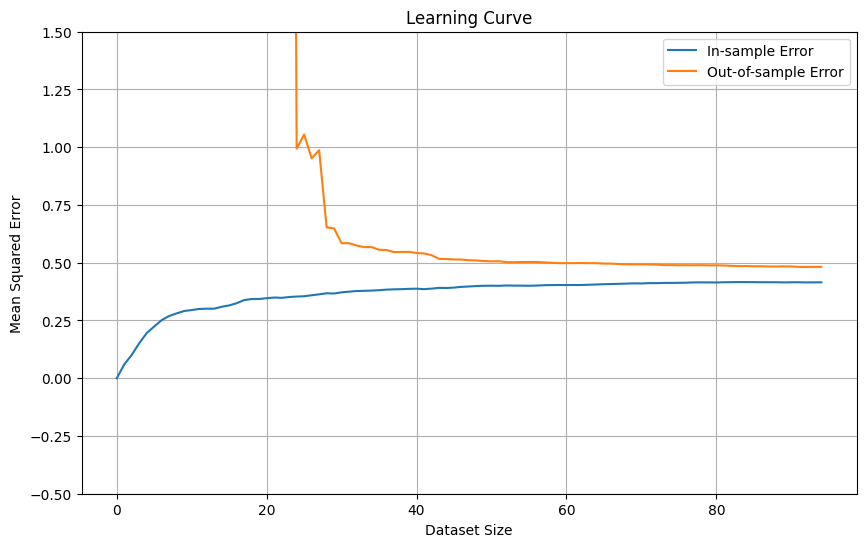

In [12]:
def generate_test_data(num_points):
    x_values = np.linspace(-5 * np.pi, 5 * np.pi, num_points)
    y_values = np.sin(x_values)
    return x_values, y_values

def calculate_errors_in_out_sample(x_train, y_train, x_test, y_test, degree):
    # Randomly shuffle
    indices = np.random.choice(len(x_train), len(x_train), replace=False)
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]
    
    in_sample_errors = []
    out_of_sample_errors = []

    for k in range(degree + 1, len(x_train) + 1):
        x_train_subset = x_train_shuffled[:k]
        y_train_subset = y_train_shuffled[:k]
        poly_coefficients = np.polyfit(x_train_subset, y_train_subset, degree)
        y_pred_train = np.polyval(poly_coefficients, x_train_subset)
        y_pred_test = np.polyval(poly_coefficients, x_test)
        in_sample_error = np.mean((y_train_subset - y_pred_train) ** 2)
        out_of_sample_error = np.mean((y_test - y_pred_test) ** 2)
        in_sample_errors.append(in_sample_error)
        out_of_sample_errors.append(out_of_sample_error)
    
    return in_sample_errors, out_of_sample_errors

def plot_learning_curve(in_sample_errors, out_of_sample_errors):
    dataset_sizes = range(len(in_sample_errors))
    
    plt.figure(figsize=(10, 6))
    plt.plot(dataset_sizes, in_sample_errors, label='In-sample Error')
    plt.plot(dataset_sizes, out_of_sample_errors, label='Out-of-sample Error')
    plt.xlabel('Dataset Size')
    plt.ylabel('Mean Squared Error')
    plt.ylim(-0.5,1.5)
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

x_test, y_test = generate_test_data(500) # take 500 evenly spaced points in the above interval (np.linspace) and apply the sine function; this will be your test dataset (for the whole exercise)
degree = 5  # pick a polynomial degree 𝑑
num_experiments = 50
in_sample_errors_avg = np.zeros(100 - degree)
out_of_sample_errors_avg = np.zeros(100 - degree)

for _ in range(num_experiments):  # do this 50 times
    x_train = np.random.uniform(-5 * np.pi, 5 * np.pi, 100) # for all training dataset sizes 𝑘 ranging from 𝑑 + 1 to 100, do the following
                                                            # sample 𝑘 amount of points (uniformly randomly) from the interval (not from the test set),
    y_train = np.sin(x_train) # apply the sine function; this will be your training dataset for this iteration

    in_sample_errors, out_of_sample_errors = calculate_errors_in_out_sample(x_train, y_train, x_test, y_test, degree) # it your polynomial, measure 𝐸𝑖𝑛, 𝐸𝑜𝑢t
    in_sample_errors_avg += np.array(in_sample_errors)
    out_of_sample_errors_avg += np.array(out_of_sample_errors)
in_sample_errors_avg /= num_experiments     #  averaging the error
out_of_sample_errors_avg /= num_experiments #  averaging the error

plot_learning_curve(in_sample_errors_avg, out_of_sample_errors_avg) # plot 𝐸𝑖𝑛 and 𝐸𝑜𝑢𝑡 versus the dataset size (learning curves)


## Other tests

Try this for polynomials of different degree (eg. 0, 1, 2, 5, 8). Note the minimal dataset
size for each degree! Based on your experiments, which polynomial (degree) would you
use if you had 20 points in your training dataset?

Degree 0: Minimal dataset size = 1


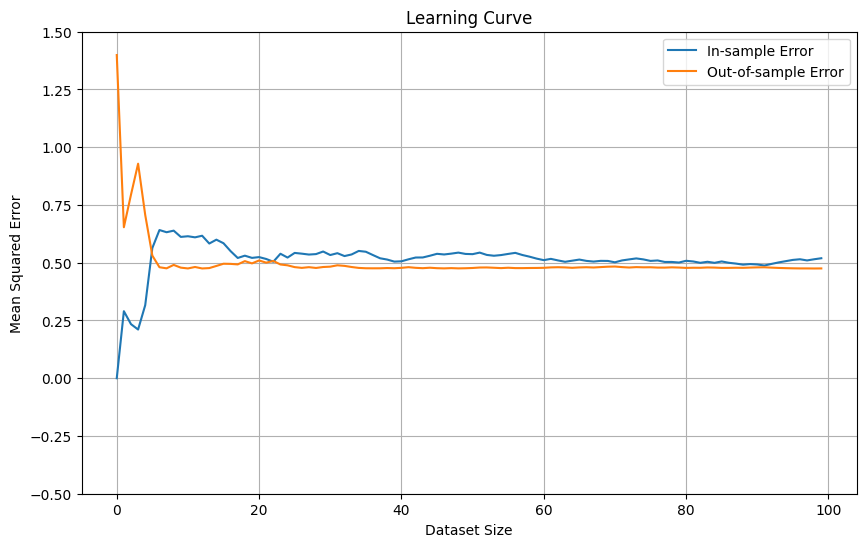

Degree 1: Minimal dataset size = 2


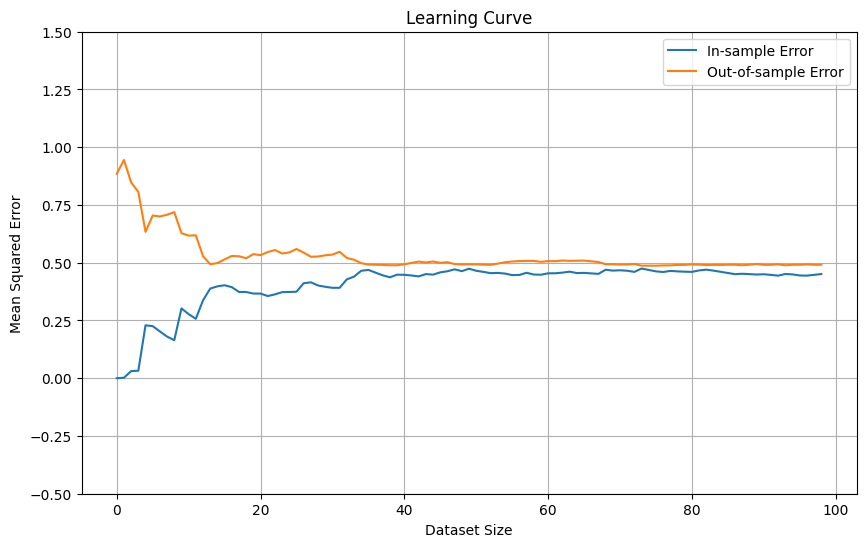

Degree 2: Minimal dataset size = 3


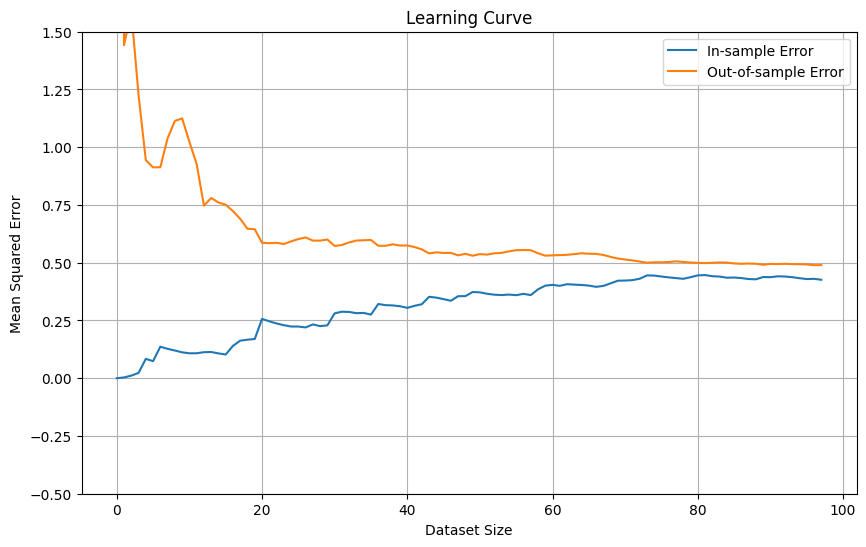

Degree 5: Minimal dataset size = 6


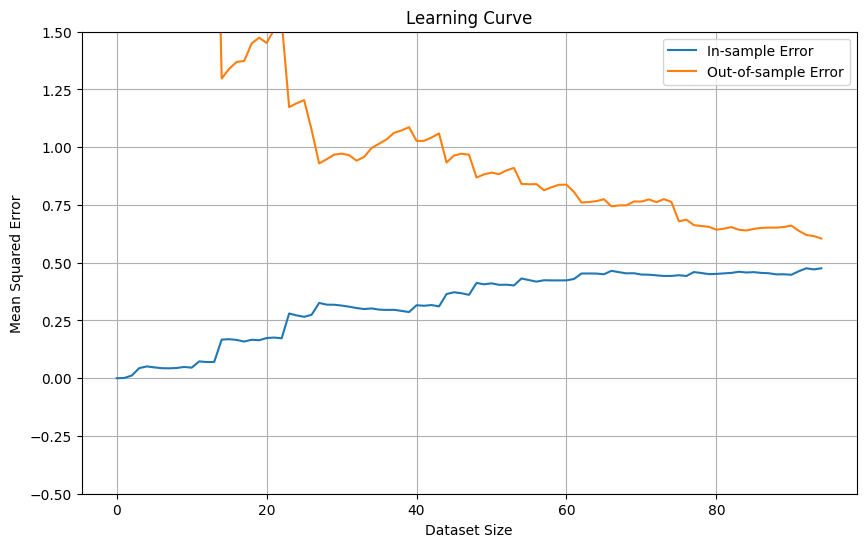

Degree 8: Minimal dataset size = 9


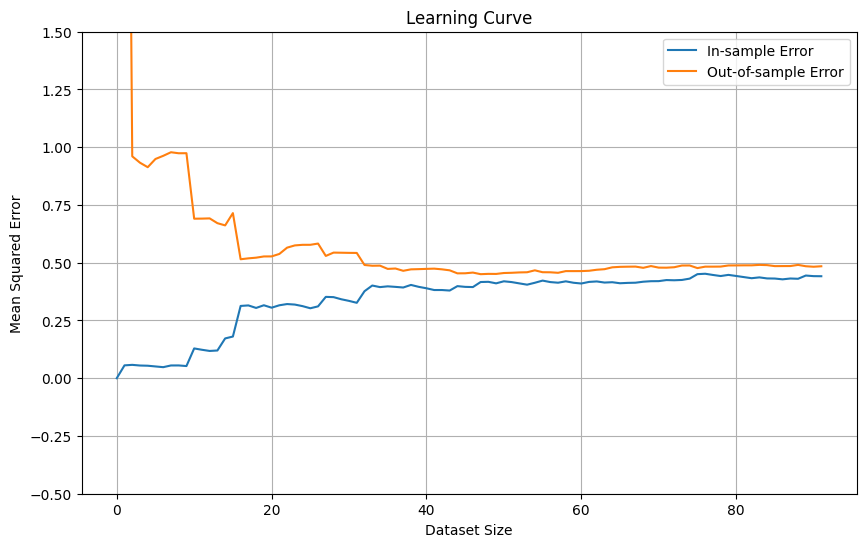

In [17]:
def calculate_errors_in_out_sample(x_train, y_train, x_test, y_test, degree):
    # Randomly shuffle the training data
    indices = np.random.choice(len(x_train), len(x_train), replace=False)
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]
    
    in_sample_errors = []
    out_of_sample_errors = []
    min_dataset_size = float('inf')  # Initialize with a very large value
    
    # Calculate errors for different sizes of training data
    for k in range(degree + 1, len(x_train) + 1):
        x_train_subset = x_train_shuffled[:k]
        y_train_subset = y_train_shuffled[:k]
        
        # Fit polynomial regression model
        poly_coefficients = np.polyfit(x_train_subset, y_train_subset, degree)
        y_pred_train = np.polyval(poly_coefficients, x_train_subset)
        y_pred_test = np.polyval(poly_coefficients, x_test)
        
        # Calculate errors
        in_sample_error = np.mean((y_train_subset - y_pred_train) ** 2)
        out_of_sample_error = np.mean((y_test - y_pred_test) ** 2)
        
        in_sample_errors.append(in_sample_error)
        out_of_sample_errors.append(out_of_sample_error)
        
        # Update minimal dataset size if necessary
        if k < min_dataset_size:
            min_dataset_size = k
    
    return in_sample_errors, out_of_sample_errors, min_dataset_size

x_test, y_test = generate_test_data(20)
degrees = [0, 1, 2, 5, 8]

for degree in degrees:
    x_train = np.random.uniform(-5 * np.pi, 5 * np.pi, 100)
    y_train = np.sin(x_train)
    in_sample_errors, out_of_sample_errors, min_dataset_size = calculate_errors_in_out_sample(x_train, y_train, x_test, y_test, degree)
    print(f"Degree {degree}: Minimal dataset size = {min_dataset_size}")
    plot_learning_curve(in_sample_errors, out_of_sample_errors) 


For a 20 point dataset size, I think the better one is maybe the degree 2 because he have the best fitting in/out sample error...